# Pyber


### Analysis

*This analysis uses a ride sharing company's recordset of historic rides and active drivers.*

* The majority of drivers (80.9%), rides (68.4%) and fares (62.7%) come from urban areas. Suburban areas have more drivers (16.5%), rides (26.3%) and fares (30.5%) than rural areas (2.6% drivers, 5.3% rides, 6.8% fares).
* Urban areas have the lowest average fare costs, while most rides take place there. Rural areas have the highest average fare costs, while the fewest rides take place there. 
* While almost a third of rides (31.6%) and total fares (37.3%) come from rural and suburban areas, only about a fifth of drivers (19.1%) are in rural and suburban areas. 

---


In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
# City File to Load 
city_data_to_load = os.path.join('data', 'city_data.csv')

city_df = pd.read_csv(city_data_to_load)

print(city_df.shape)
city_df.head()

(120, 3)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Ride File to Load 
ride_data_to_load = os.path.join('data', 'ride_data.csv')

ride_df = pd.read_csv(ride_data_to_load)

print(ride_df.shape)
ride_df.head()

(2375, 4)


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset
city_ride_df = pd.merge(ride_df, city_df, how='left', on='city')

city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [6]:
# x and y coordinates for urban areas
urban_df = city_ride_df[city_ride_df['type'] == 'Urban']
urban_city_gb = urban_df.groupby('city')

ave_fare_urban_s = urban_city_gb['fare'].mean()
rides_ct_urban_s = urban_city_gb['ride_id'].count()
drivers_ct_urban_s = urban_city_gb['driver_count'].mean()

In [7]:
# x and y coordinates for suburban areas
suburban_df = city_ride_df[city_ride_df['type'] == 'Suburban']
suburban_city_gb = suburban_df.groupby('city')

ave_fare_suburban_s = suburban_city_gb['fare'].mean()
rides_ct_suburban_s = suburban_city_gb['ride_id'].count()
drivers_ct_suburban_s = suburban_city_gb['driver_count'].mean()

In [8]:
# x and y coordinates for rural areas
rural_df = city_ride_df[city_ride_df['type'] == 'Rural']
rural_city_gb = rural_df.groupby('city')

ave_fare_rural_s = rural_city_gb['fare'].mean()
rides_ct_rural_s = rural_city_gb['ride_id'].count()
drivers_ct_rural_s = rural_city_gb['driver_count'].mean()

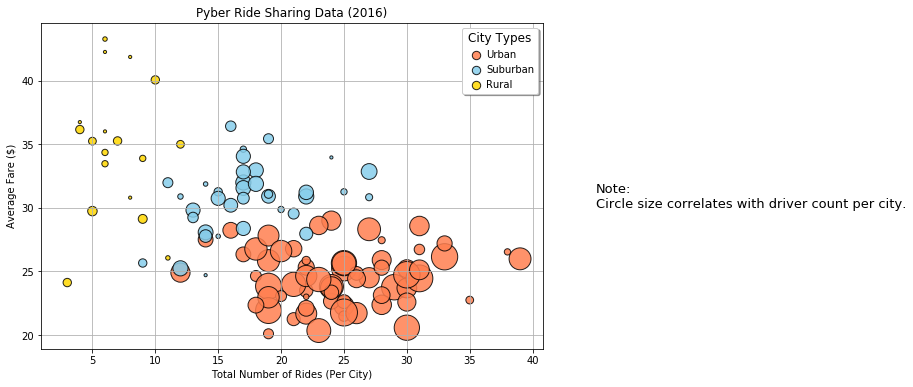

In [9]:
plt.figure(figsize=(9,6))

# scatter plot for urban areas
plt.scatter(rides_ct_urban_s, 
            ave_fare_urban_s, facecolors='coral', edgecolors='black',
            s=drivers_ct_urban_s*10, alpha=0.85, label='Urban')

# scatter plot for suburban areas
plt.scatter(rides_ct_suburban_s, 
            ave_fare_suburban_s, facecolors='skyblue', edgecolors='black',
            s=drivers_ct_suburban_s*10, alpha=0.85, label='Suburban')

# scatter plot for rural areas
plt.scatter(rides_ct_rural_s, 
            ave_fare_rural_s, facecolors='gold', edgecolors='black',
            s=drivers_ct_rural_s*10, alpha=0.85, label='Rural')

# other graph properties
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.grid()

# legend
scatter_legend = plt.legend(loc='best', title='City Types', shadow=True, fancybox=True, labelspacing=.5, 
                            handletextpad=.01)

# enlarges legend title
plt.setp(scatter_legend.get_title(),fontsize='large')

# adjusts size of legend markers
scatter_legend.legendHandles[0]._sizes = [70]
scatter_legend.legendHandles[1]._sizes = [70]
scatter_legend.legendHandles[2]._sizes = [70]

# label regarding circle size
plt.text(45, 30, 'Note:\nCircle size correlates with driver count per city.', fontsize=13)

plt.show()

In [10]:
# Save Figure
plt.savefig(os.path.join('images', 'bubble_plot.png'))

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

In [11]:
def explode_max(s):
    max_val = max(s)
    explode=[]
    for x in s:
        if x == max_val:
            print(x)
            explode.append(0.1)
        else:
            explode.append(0)
    return explode

In [12]:
# Fares Percents
city_ride_type_gb = city_ride_df.groupby('type')

fare_perc_s = city_ride_type_gb['fare'].sum() / city_ride_df['fare'].sum()

0.627246349622845


Text(0.5,1,'% of Total Fares by City Type')

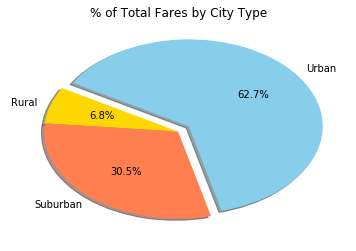

In [13]:
colors = ['gold', 'coral', 'skyblue']

plt.pie(fare_perc_s, 
        labels=fare_perc_s.index, 
        colors=colors,
        explode=explode_max(fare_perc_s), 
        autopct='%1.1f%%', 
        startangle=150,
        shadow=True)

plt.title('% of Total Fares by City Type')

In [14]:
plt.savefig(os.path.join('images', 'total_fares.png'))

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

In [15]:
# Ride Percents
ride_perc_s = city_ride_type_gb['ride_id'].count() / city_ride_df['ride_id'].count()

0.6842105263157895


Text(0.5,1,'% of Total Rides by City Type')

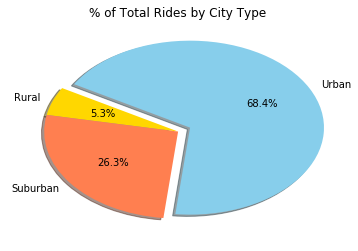

In [16]:
# Pie Chart
plt.pie(ride_perc_s, 
        labels=ride_perc_s.index, 
        colors=colors,
        explode=explode_max(ride_perc_s), 
        autopct='%1.1f%%', 
        startangle=150,
        shadow=True)

plt.title('% of Total Rides by City Type')

In [17]:
plt.savefig(os.path.join('images', 'total_rides.png'))

<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

In [18]:
# Driver Percents
city_type_df = city_df.groupby('type')

driver_perc_s = city_type_df['driver_count'].sum() / city_df['driver_count'].sum()

0.8089471913891692


Text(0.5,1,'% of Total Drivers by City Type')

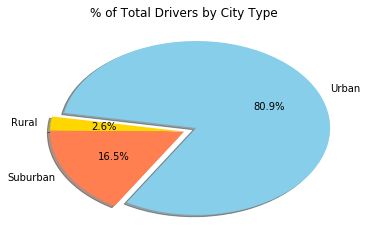

In [19]:
# Pie Charts
plt.pie(driver_perc_s, 
        labels=driver_perc_s.index, 
        colors=colors,
        explode=explode_max(driver_perc_s), 
        autopct='%1.1f%%', 
        startangle=170,
        shadow=True)

plt.title('% of Total Drivers by City Type')

In [20]:
plt.savefig(os.path.join('images', 'total_drivers.png'))

<Figure size 432x288 with 0 Axes>